In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Importing the data
data = pd.read_csv(r"C:\Users\ebello\OneDrive - United Against Poverty\Desktop\D.A.P\u.s_gdp_percent_change_per_quarter.csv")
print(data.head())

  Time Period  GDP Growth
0     Q1/2020        -5.3
1     Q2/2020       -28.0
2     Q3/2020        34.8
3     Q4/2020         4.2
4     Q1/2021         5.2


In [3]:
# Learning the shape of the dataset
print(data.shape)

(16, 2)


In [4]:
# Learning what oata types are in the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time Period  16 non-null     object 
 1   GDP Growth   16 non-null     float64
dtypes: float64(1), object(1)
memory usage: 388.0+ bytes
None


In [5]:
# Learning if there are any null values in the dataset
print(data.isnull().sum())

Time Period    0
GDP Growth     0
dtype: int64


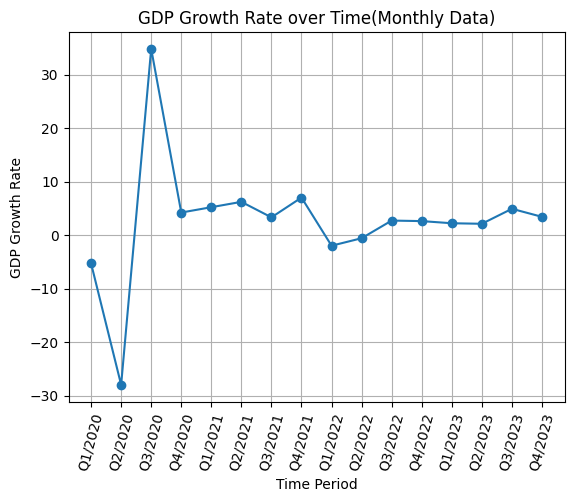

In [6]:
# Plotting the dataset in matplotlib
plt.plot(data['Time Period'], data['GDP Growth'],marker='o')
plt.xlabel('Time Period')
plt.ylabel('GDP Growth Rate')
plt.xticks(rotation = 75)
plt.title('GDP Growth Rate over Time(Monthly Data)')
plt.grid(True)
plt.show()

In [7]:
# Creating copy for further data analysis
quarterly_data = data.copy()

# Calculate recession based on quarterly GDP growth
quarterly_data['Recession'] = ((quarterly_data['GDP Growth'] < 0) & (quarterly_data['GDP Growth'].shift(1) < 0))

# Fill missing values with False (since the first quarter cannot be in a recession)
quarterly_data['Recession'].fillna(False, inplace=True)

quarterly_data.head()

C:\Users\ebello\AppData\Local\Temp\ipykernel_23940\1404467089.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  quarterly_data['Recession'].fillna(False, inplace=True)


,Time Period,GDP Growth,Recession
0,Q1/2020,-5.3,False
1,Q2/2020,-28.0,True
2,Q3/2020,34.8,False
3,Q4/2020,4.2,False
4,Q1/2021,5.2,False


In [8]:
# Determing where in the dataset a recession occurred
recession_period = quarterly_data.loc[quarterly_data['Recession'] == True, 'Time Period'].tolist()
print(recession_period)

['Q2/2020', 'Q2/2022']


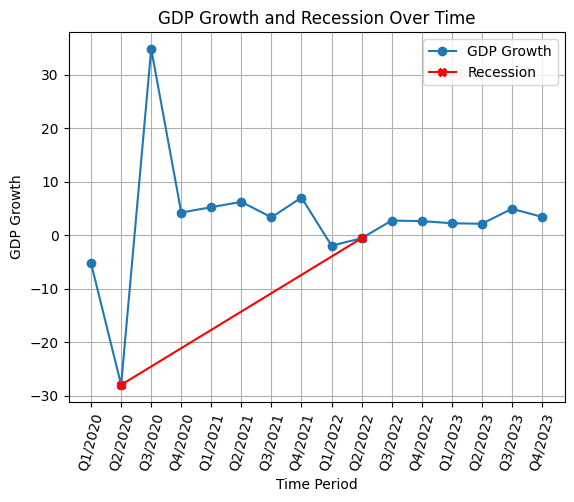

In [9]:
# Visualizing where in the dataset the recession occurred
recession_period = quarterly_data.loc[quarterly_data['Recession'] == True]

plt.plot(quarterly_data['Time Period'],quarterly_data['GDP Growth'], label='GDP Growth',marker='o')
plt.plot(recession_period['Time Period'], recession_period['GDP Growth'], color='Red', label='Recession', marker='X')
plt.xlabel('Time Period')
plt.ylabel('GDP Growth')
plt.xticks(rotation=75)
plt.title('GDP Growth and Recession Over Time')
plt.grid(True)
plt.legend()

plt.show()

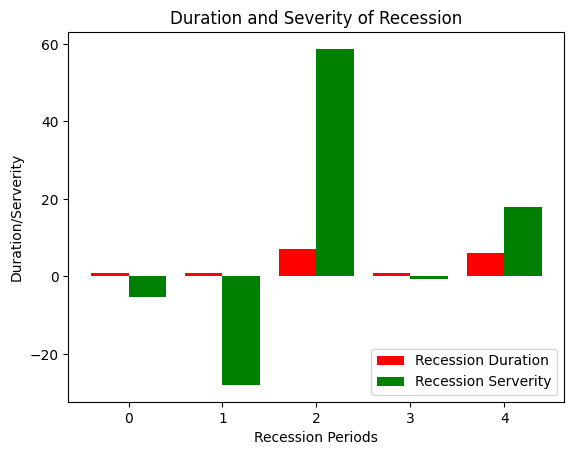

In [10]:
# Analyzing the severity and duration of the recession


# Creating variables that measure the severity and duration of a recession
quarterly_data['Recession Start'] = quarterly_data['Recession'].ne(quarterly_data['Recession'].shift()).cumsum()
recession_period = quarterly_data.groupby('Recession Start')
recession_duration = recession_period.size()
recession_severity = recession_period['GDP Growth'].sum()


# Plotting the graph for visualization
x = np.arange(len(recession_duration))
width = 0.40

plt.bar(x - width/2, recession_duration, width, label='Recession Duration', color='red')
plt.bar(x + width/2, recession_severity, width, label='Recession Serverity', color='green')
plt.xticks(x)
plt.xlabel('Recession Periods')
plt.ylabel('Duration/Serverity')
plt.title('Duration and Severity of Recession')
plt.legend(loc='lower right')
plt.show()